# Multi linear regression 

We want to compute a multi linear regression between the parameter values for each perturbation and the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis). 

#### Emulator equation : Y = f(X) 
* Y is a 1x50 matrix containing the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis).
* X is a 30X50 matrix containing the 30 values of the physical parameters, for the 50 perturbations.

## Import modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

## Import functions

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

## Lasso Model (multi linear regression, Cross-Validation)

## Tunage du modèle

In [3]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

Computing regularization path using the coordinate descent lasso...


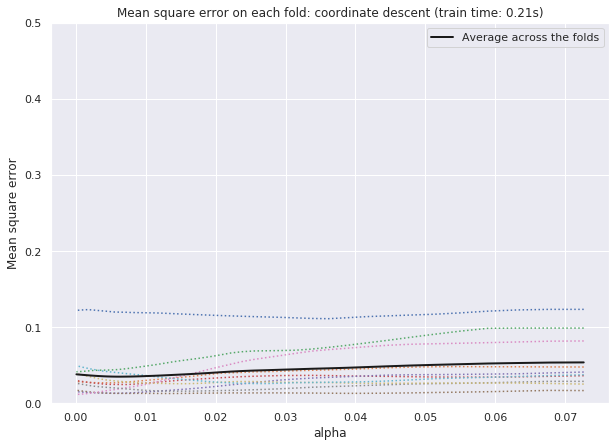

In [4]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=10).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 0.5
xmin, xmax = 0, 0.5
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Computing regularization path using the coordinate descent lasso...


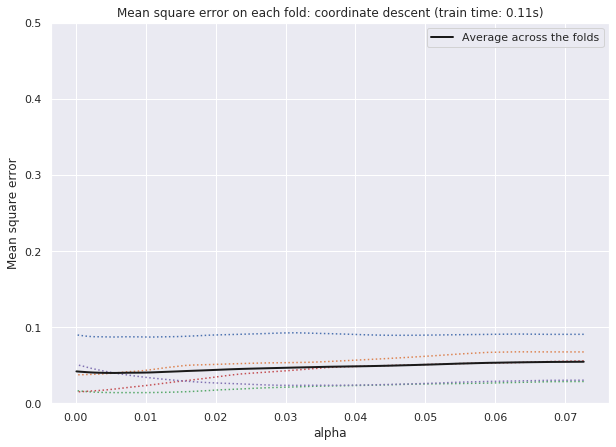

In [5]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=5).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 0.5
xmin, xmax = 0, 0.5
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV5.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Creation du modèle

In [6]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [7]:
alpha = 0.01

In [8]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 -0.5970287711962181
Coefficients: 
 [-0.05740682 -0.07354524 -0.02018706  0.01160199  0.03641888  0.02625275
  0.         -0.05219859 -0.01034865 -0.         -0.02827901 -0.03262237
  0.          0.0243905  -0.03013668  0.00041938  0.01347542 -0.01925101
  0.03526675  0.          0.          0.03252663  0.00560982 -0.00733135
 -0.00476871  0.00084097 -0.          0.         -0.00349303 -0.0427066 ]
Score: 
 0.622050146489611


In [9]:
Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
#Coeffs = pd.DataFrame([lasso.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs


AKN           -0.057407
ALPHAT        -0.073545
ALD           -0.020187
ALMAVE         0.011602
AGREF          0.036419
AGRE1          0.026253
AGRE2          0.000000
RAUTEFR       -0.052199
RQLCR         -0.010349
RAUTEFS       -0.000000
RQICRMIN      -0.028279
RQICRMAX      -0.032622
TFVL           0.000000
TFVI           0.024390
TFVR          -0.030137
TFVS           0.000419
RKDN           0.013475
RKDX          -0.019251
TENTR          0.035267
TENTRX         0.000000
VVN            0.000000
VVX            0.032527
ALFX           0.005610
FNEBC         -0.007331
GCTURB        -0.004769
RLWINHF_ICE    0.000841
RLWINHF_LIQ   -0.000000
RSWINHF_ICE    0.000000
RSWINHF_LIQ   -0.003493
REFLCAPE      -0.042707
Name: 0, dtype: float64

In [10]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(X_df.values)
tmp = [0]*N
y_eq = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq[i] = tmp[i].sum()+R
    i+=1
    
#y_eq 

In [11]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']

y_true = y

DFYeq_lasso = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq_lasso['members'] = nb_p_list
DFYeq_lasso['members_0'] = range(0,102,1)
#DF=DFYeq.sort_values(by='y_true')
DFYeq_lasso

,y_true,y_eq,members,members_0
0,-1.238783,-0.789826,p311,0
1,-0.402265,-0.477892,p312,1
2,-0.854315,-0.762114,p314,2
3,-0.799620,-0.641920,p316,3
4,-1.402954,-0.727852,p317,4
...,...,...,...,...
97,-0.650619,-0.572511,p465,97
98,-0.613042,-0.571763,p467,98
99,-0.508695,-0.442002,p469,99
100,-0.628773,-0.398752,p470,100


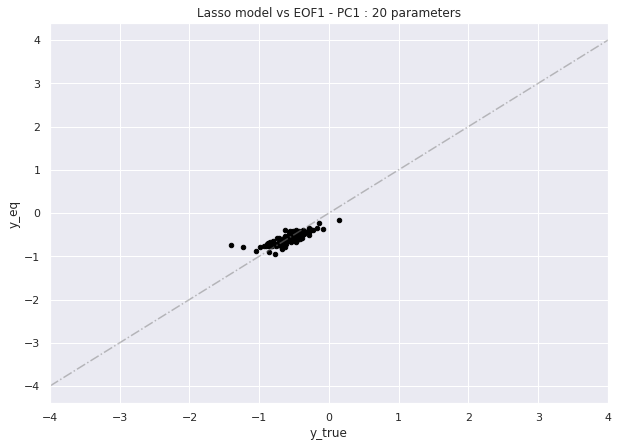

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#print('Coefficient of determination: %.2f'
#      % r2_score(X_test, y_pred))

ax = plt.gca()
title = 'Lasso model vs EOF1 - PC1 : 20 parameters'

diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax)

DFYeq_lasso.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred_lasso, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
#plt.xlim(1.0,2.8)
#plt.ylim(1.0,2.8)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE2_Lasso_12.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [0.45001196]
Coefficient of determination: 0.69


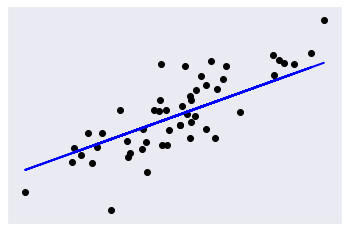

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_eq[:50]#.reshape(-1, 1) 
y_test = y_eq[50:]#.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

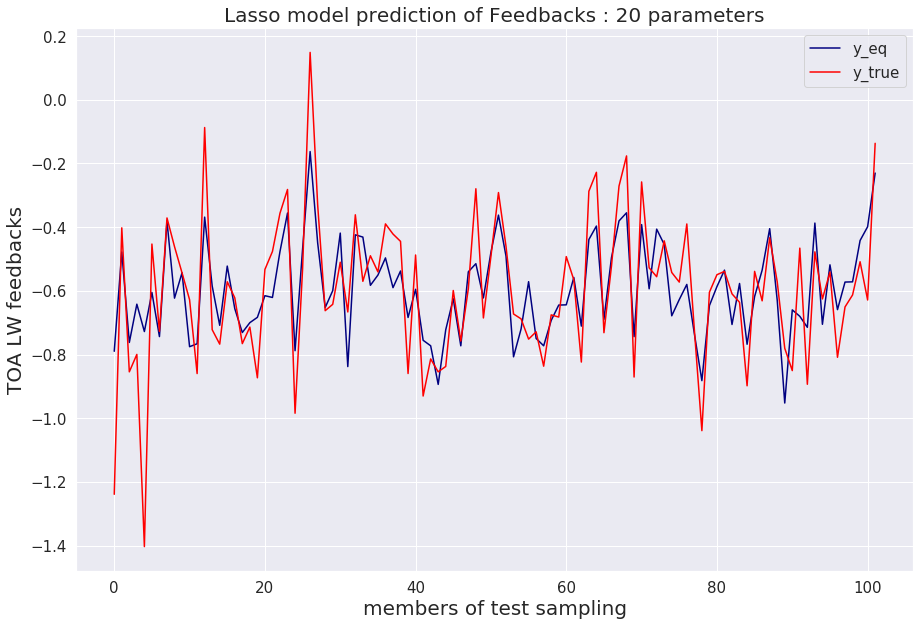

In [16]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members_0", y="y_eq", data=DFYeq_lasso, color='navy',ax=ax)
ax = sns.lineplot(x="members_0", y="y_true", data=DFYeq_lasso, color='red',ax=ax)
plt.title('Lasso model prediction of Feedbacks : 20 parameters', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members of test sampling',fontsize=20)
plt.ylabel('TOA LW feedbacks',fontsize=20)
#plt.ylim(1.0,2.8)
ax.tick_params(axis='both', labelsize=15)

## LASSO model : prediction

In [17]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [18]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 -0.5970287711962181
Coefficients: 
 [-0.05740682 -0.07354524 -0.02018706  0.01160199  0.03641888  0.02625275
  0.         -0.05219859 -0.01034865 -0.         -0.02827901 -0.03262237
  0.          0.0243905  -0.03013668  0.00041938  0.01347542 -0.01925101
  0.03526675  0.          0.          0.03252663  0.00560982 -0.00733135
 -0.00476871  0.00084097 -0.          0.         -0.00349303 -0.0427066 ]
Score: 
 0.622050146489611


In [19]:
Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
#Coeffs = pd.DataFrame([lasso.coef_]).iloc[0]
Coeffs

AKN           -0.057407
ALPHAT        -0.073545
ALD           -0.020187
ALMAVE         0.011602
AGREF          0.036419
AGRE1          0.026253
AGRE2          0.000000
RAUTEFR       -0.052199
RQLCR         -0.010349
RAUTEFS       -0.000000
RQICRMIN      -0.028279
RQICRMAX      -0.032622
TFVL           0.000000
TFVI           0.024390
TFVR          -0.030137
TFVS           0.000419
RKDN           0.013475
RKDX          -0.019251
TENTR          0.035267
TENTRX         0.000000
VVN            0.000000
VVX            0.032527
ALFX           0.005610
FNEBC         -0.007331
GCTURB        -0.004769
RLWINHF_ICE    0.000841
RLWINHF_LIQ   -0.000000
RSWINHF_ICE    0.000000
RSWINHF_LIQ   -0.003493
REFLCAPE      -0.042707
Name: 0, dtype: float64

In [20]:
# Let's use the model equation : 

X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(LHS_df.values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*LHS_df.iloc[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
y_pred

[-0.522120766758311,
 -0.3944740522094432,
 -0.46900222827772714,
 -0.6811176737774246,
 -0.5402710948853301,
 -0.44412234100780124,
 -0.6474513496763087,
 -0.4619906782115566,
 -0.8682456425602088,
 -0.7676154218568356,
 -0.629554602362528,
 -0.4714705871725604,
 -0.59178886896561,
 -0.8579163342558841,
 -0.29975000916217887,
 -0.574422742303024,
 -0.3082489549843648,
 -0.69013217181743,
 -0.38464613665922376,
 -0.3617658133659019,
 -0.5345787721715136,
 -0.6282922256067134,
 -0.4574888198250655,
 -0.5030989327896643,
 -0.5079760465497422,
 -0.5908802881355445,
 -0.6904847520345796,
 -0.5113790564933813,
 -0.7030066534583749,
 -0.8107965247024608,
 -0.48822705805223476,
 -0.6786687310363462,
 -0.5976087057344396,
 -0.4519763335333122,
 -0.42459290606738653,
 -0.7539962544347844,
 -0.8827806632921102,
 -0.784126825195717,
 -0.6215166432846035,
 -0.3987657794366554,
 -0.38855448387042946,
 -0.4722918600197278,
 -0.9852009889714299,
 -0.6854881325737828,
 -0.5010198693052261,
 -0.8818805

In [21]:
members = arange(102,1102,1)
DFYpred_lasso = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred_lasso

,y_pred,members
0,-0.522121,102.0
1,-0.394474,103.0
2,-0.469002,104.0
3,-0.681118,105.0
4,-0.540271,106.0
...,...,...
995,-0.361638,1097.0
996,-0.759113,1098.0
997,-0.558017,1099.0
998,-0.165427,1100.0


## Multi Linear Regression model 

In [22]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [23]:
X.shape

(102, 30)

In [24]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -0.597028771196218
Coefficients: 
 [-0.06956404 -0.08374792 -0.02751958  0.01743058  0.03994956  0.03577241
  0.00295868 -0.06142288 -0.01642105 -0.01117891 -0.03443108 -0.05053799
 -0.00054241  0.03602557 -0.03387965  0.01624651  0.02809992 -0.02627373
  0.05772958 -0.01499955 -0.0048491   0.04420538  0.01996117 -0.02046245
 -0.02059705  0.01624456 -0.00719761  0.0011919  -0.0221017  -0.06750299]
Score: 
 0.6744894562879027


In [25]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]).iloc[0]
Coeffs

0    -0.069564
1    -0.083748
2    -0.027520
3     0.017431
4     0.039950
5     0.035772
6     0.002959
7    -0.061423
8    -0.016421
9    -0.011179
10   -0.034431
11   -0.050538
12   -0.000542
13    0.036026
14   -0.033880
15    0.016247
16    0.028100
17   -0.026274
18    0.057730
19   -0.015000
20   -0.004849
21    0.044205
22    0.019961
23   -0.020462
24   -0.020597
25    0.016245
26   -0.007198
27    0.001192
28   -0.022102
29   -0.067503
Name: 0, dtype: float64

In [26]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = regr.intercept_

N=len(X)
tmp = [0]*N
y_eq = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq[i] = tmp[i].sum()+R
    i+=1
    
#y_eq 

In [27]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']

y_true = y

DFYeq = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq['members'] = nb_p_list
DFYeq['members_0'] = range(0,102,1)
#DF=DFYeq.sort_values(by='y_true')
DFYeq

,y_true,y_eq,members,members_0
0,-1.238783,-0.792052,p311,0
1,-0.402265,-0.491545,p312,1
2,-0.854315,-0.833284,p314,2
3,-0.799620,-0.683615,p316,3
4,-1.402954,-0.787079,p317,4
...,...,...,...,...
97,-0.650619,-0.571069,p465,97
98,-0.613042,-0.562254,p467,98
99,-0.508695,-0.404649,p469,99
100,-0.628773,-0.379861,p470,100


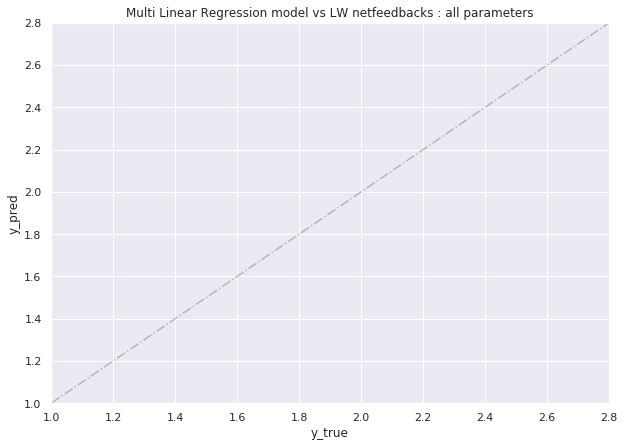

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = plt.gca()
title = 'Multi Linear Regression model vs LW netfeedbacks : all parameters'

diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax)

DFYeq.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title(title)
plt.xlim(1.0,2.8)
plt.ylim(1.0,2.8)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [0.58369964]
Coefficient of determination: 0.64


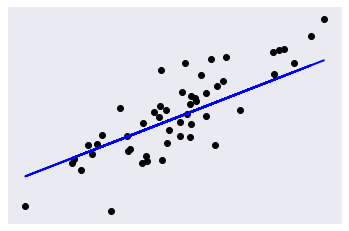

In [29]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_eq[:50]#.reshape(-1, 1) 
y_test = y_eq[50:]#.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

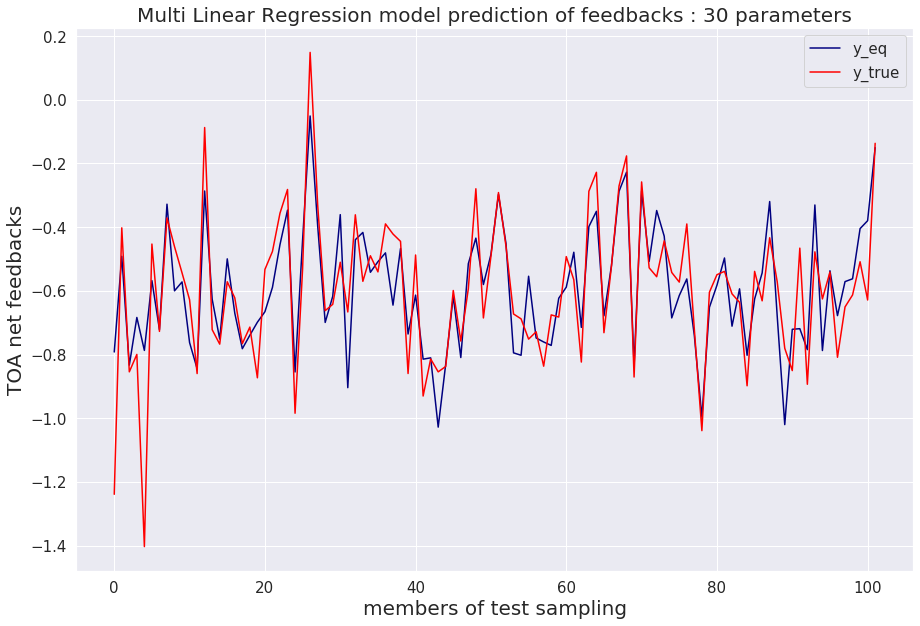

In [31]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members_0", y="y_eq", data=DFYeq, color='navy',ax=ax)
ax = sns.lineplot(x="members_0", y="y_true", data=DFYeq, color='red',ax=ax)
plt.title('Multi Linear Regression model prediction of feedbacks : 30 parameters', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members of test sampling',fontsize=20)
plt.ylabel('TOA net feedbacks',fontsize=20)
#plt.ylim(1.0,2.8)
ax.tick_params(axis='both', labelsize=15)

## Multi Linear Regression model : prediction

In [32]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [33]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -0.597028771196218
Coefficients: 
 [-0.06956404 -0.08374792 -0.02751958  0.01743058  0.03994956  0.03577241
  0.00295868 -0.06142288 -0.01642105 -0.01117891 -0.03443108 -0.05053799
 -0.00054241  0.03602557 -0.03387965  0.01624651  0.02809992 -0.02627373
  0.05772958 -0.01499955 -0.0048491   0.04420538  0.01996117 -0.02046245
 -0.02059705  0.01624456 -0.00719761  0.0011919  -0.0221017  -0.06750299]
Score: 
 0.6744894562879027


In [34]:
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs
#Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

AKN           -0.069564
ALPHAT        -0.083748
ALD           -0.027520
ALMAVE         0.017431
AGREF          0.039950
AGRE1          0.035772
AGRE2          0.002959
RAUTEFR       -0.061423
RQLCR         -0.016421
RAUTEFS       -0.011179
RQICRMIN      -0.034431
RQICRMAX      -0.050538
TFVL          -0.000542
TFVI           0.036026
TFVR          -0.033880
TFVS           0.016247
RKDN           0.028100
RKDX          -0.026274
TENTR          0.057730
TENTRX        -0.015000
VVN           -0.004849
VVX            0.044205
ALFX           0.019961
FNEBC         -0.020462
GCTURB        -0.020597
RLWINHF_ICE    0.016245
RLWINHF_LIQ   -0.007198
RSWINHF_ICE    0.001192
RSWINHF_LIQ   -0.022102
REFLCAPE      -0.067503
Name: 0, dtype: float64

In [35]:
# Let's use the model equation : 

R = regr.intercept_

N=len(LHS_df.values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*LHS_df.iloc[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
y_pred

[-0.4795305369506607,
 -0.2141162971248705,
 -0.4051916599363598,
 -0.648504584547605,
 -0.5876087306890853,
 -0.3837724180981641,
 -0.6332280366796343,
 -0.38502503288423523,
 -0.8778380941877635,
 -0.787447061327934,
 -0.6048451758608788,
 -0.4413902592469865,
 -0.5430619158962338,
 -0.9802378208607694,
 -0.14035482152327922,
 -0.5750744054166046,
 -0.23805890156563214,
 -0.6581813345608153,
 -0.3142349356914623,
 -0.33148496457932447,
 -0.46791313366672493,
 -0.6333545904942982,
 -0.419865387016961,
 -0.4062947024763147,
 -0.5664000123193066,
 -0.5589205485285753,
 -0.7644985556383259,
 -0.36040833907518066,
 -0.8152688741670389,
 -0.8744393919672572,
 -0.4951520611956777,
 -0.688441761559884,
 -0.5559054878264521,
 -0.34017850000801114,
 -0.4265978205547301,
 -0.7725184372440692,
 -0.9820799109994764,
 -0.7371211027086637,
 -0.6300936455796625,
 -0.49668557691016857,
 -0.3306108077417037,
 -0.4708341002482861,
 -1.1164595996484696,
 -0.7417366405793959,
 -0.46089288722553456,
 -1.0

In [36]:
members = arange(102,1102,1)
DFYpred = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred

,y_pred,members
0,-0.479531,102.0
1,-0.214116,103.0
2,-0.405192,104.0
3,-0.648505,105.0
4,-0.587609,106.0
...,...,...
995,-0.290292,1097.0
996,-0.761847,1098.0
997,-0.534084,1099.0
998,-0.123142,1100.0


## Neural Network 

In [37]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [38]:
# split the dataset
X_train = X[0:80,:]
X_test = X[80:,:]
#X_val = X[40:,:]

y_train = y[0:80]
y_test = y[80:]
#y_val = y[40:]

In [39]:
skill_score=[]

i=1
N=100
while i<N: 
    NN = MLPRegressor(alpha=0.01, hidden_layer_sizes=(i, 2))
    NN = NN.fit(X_train,y_train)
    y_pred = NN.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    skill_score.append(score)
    i = ( i + 1 )

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

In [40]:
## BUILD the SKILL dataframe
skill_maxIter = pd.DataFrame()
skill_maxIter['hidden_layer_sizes']=np.arange(1,100,1)
skill_maxIter['RMSE']=skill_score

skill_maxIter

,hidden_layer_sizes,RMSE
0,1,0.788129
1,2,1.331844
2,3,0.167237
3,4,0.340409
4,5,0.459114
...,...,...
94,95,0.185462
95,96,0.308553
96,97,0.231602
97,98,1.601801


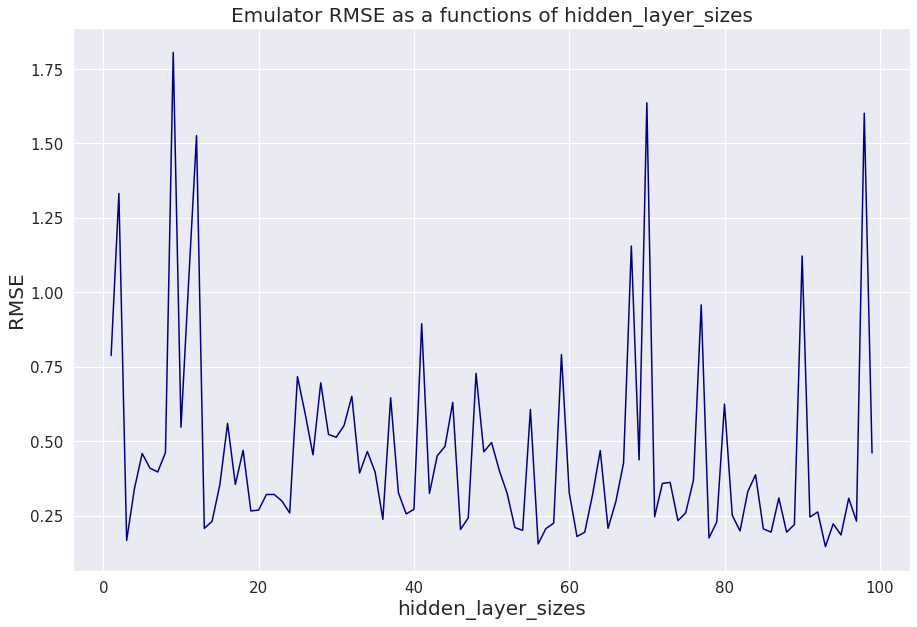

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the skill_score    
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="hidden_layer_sizes", y="RMSE", data=skill_maxIter,color='navy',ax=ax)
plt.title('Emulator RMSE as a functions of hidden_layer_sizes', fontsize=20)
plt.xlabel('hidden_layer_sizes',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
ax.tick_params(axis='both', labelsize=15)

#   Enregistrer les figures ...............................................................

#plt.savefig("/data/home/globc/peatier/figures/Hyperparameters_tuning_log.png", dpi=None, 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show plot 
plt.show()

In [42]:
skill_score=[]

i=1
N=10
while i<N: 
    NN = MLPRegressor(alpha=0.01, hidden_layer_sizes=(5, i))
    NN = NN.fit(X_train,y_train)
    y_pred = NN.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    skill_score.append(score)
    i = ( i + 1 )

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

In [43]:
## BUILD the SKILL dataframe
skill_maxIter = pd.DataFrame()
skill_maxIter['n_layer']=np.arange(1,10,1)
skill_maxIter['RMSE']=skill_score

skill_maxIter

,n_layer,RMSE
0,1,0.385408
1,2,0.376850
2,3,0.685516
3,4,1.481825
4,5,0.309291
5,6,0.326640
6,7,0.638110
7,8,0.365282
8,9,0.201829


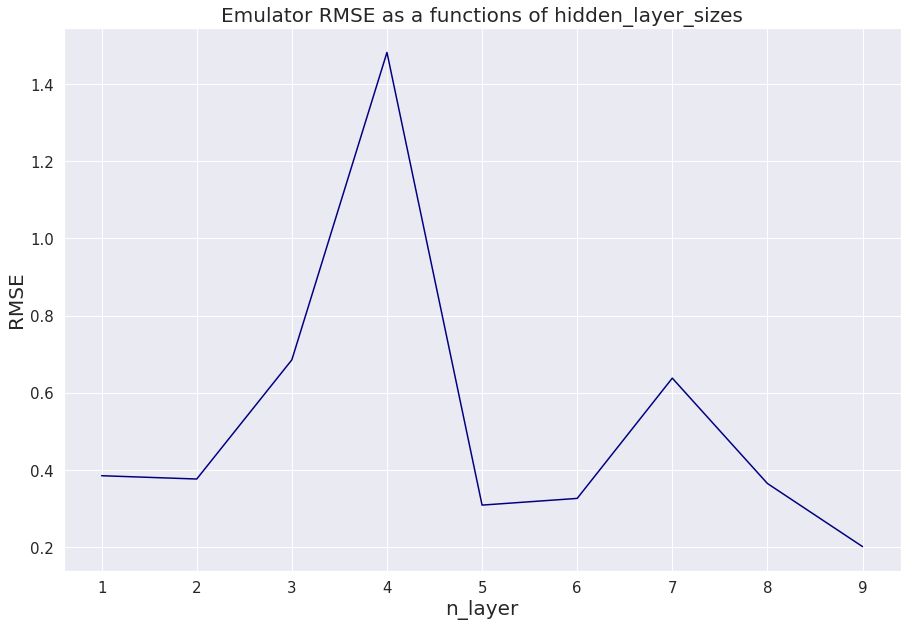

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the skill_score    
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="n_layer", y="RMSE", data=skill_maxIter,color='navy',ax=ax)
plt.title('Emulator RMSE as a functions of hidden_layer_sizes', fontsize=20)
plt.xlabel('n_layer',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
ax.tick_params(axis='both', labelsize=15)

#   Enregistrer les figures ...............................................................

#plt.savefig("/data/home/globc/peatier/figures/Hyperparameters_tuning_log.png", dpi=None, 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show plot 
plt.show()

## Création du modèle

In [45]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [46]:
# split the dataset
X_train = X[0:80,:]
X_test = X[80:,:]
#X_val = X[40:,:]

y_train = y[0:80]
y_test = y[80:]
#y_val = y[40:]

In [48]:
NN = MLPRegressor(hidden_layer_sizes=(4), max_iter=500)
NN = NN.fit(X_train,y_train)

y_val = NN.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_val))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_val)))

Mean Absolute Error: 0.2521489651364633
Mean Squared Error: 0.0871973071858332
Root Mean Squared Error: 0.29529190165975294


In [49]:
DFYeq_NN  = pd.DataFrame()
DFYeq_NN['y_eq'] = y_val
DFYeq_NN['y_true'] = y_test
DFYeq_NN['members'] = range(0,22,1)
#DFYeq_NN

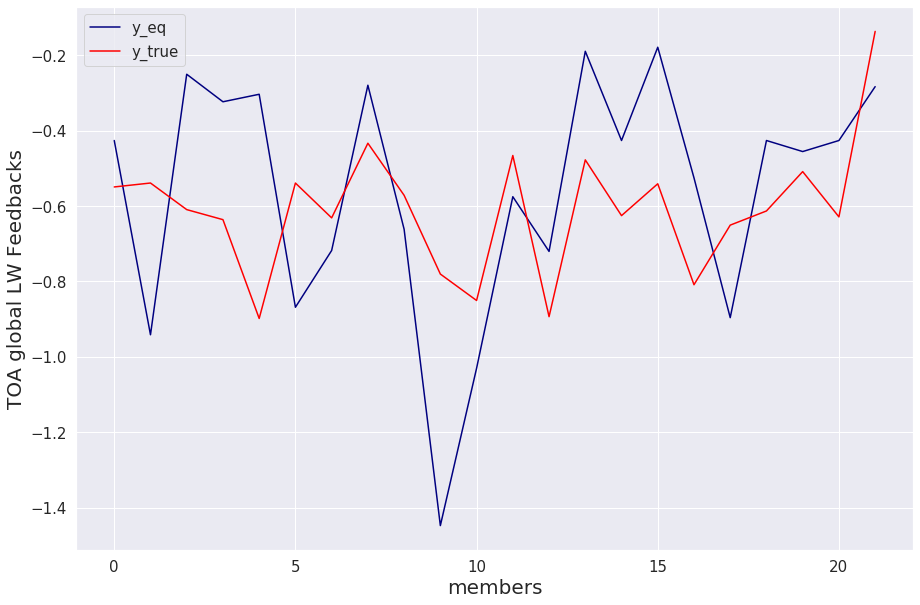

In [51]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members", y="y_eq", data=DFYeq_NN,color='navy',ax=ax)
ax = sns.lineplot(x="members", y="y_true", data=DFYeq_NN,color='red',ax=ax)
#plt.title('Emulator RMSE as a functions of max_iter', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members',fontsize=20)
plt.ylabel('TOA global LW Feedbacks',fontsize=20)
#plt.ylim(1.0,2.8)
ax.tick_params(axis='both', labelsize=15)

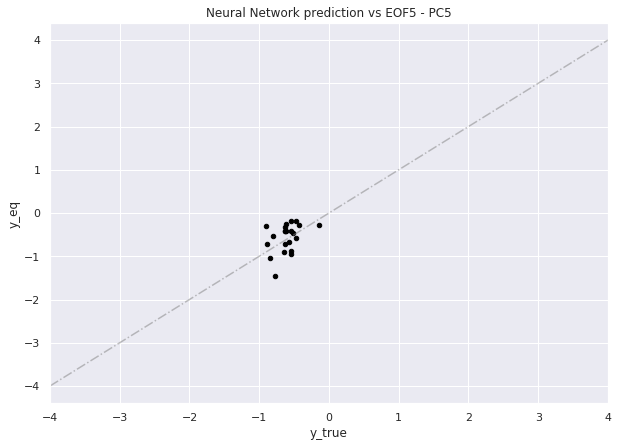

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = plt.gca()
title = 'Neural Network prediction vs EOF5 - PC5'

diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax)



DFYeq_NN.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
#plt.xlim(1.0,2.8)
#plt.ylim(1.0,2.8)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [54]:
y_val_full = NN.predict(X)

DFYeq_full_NN  = pd.DataFrame()
DFYeq_full_NN['y_eq'] = y_val_full
DFYeq_full_NN['y_true'] = y
DFYeq_full_NN

,y_eq,y_true
0,-1.129196,-1.238783
1,-0.534963,-0.402265
2,-0.980612,-0.854315
3,-0.682341,-0.799620
4,-1.070833,-1.402954
...,...,...
97,-0.895948,-0.650619
98,-0.426215,-0.613042
99,-0.455508,-0.508695
100,-0.426215,-0.628773


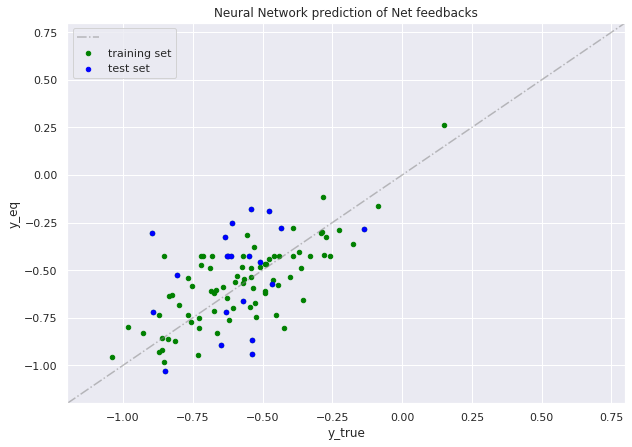

In [56]:
ax = plt.gca()
title = 'Neural Network prediction of Net feedbacks'

DFYeq_full_NN.plot(kind='scatter', x='y_true', y='y_eq', color='green', figsize=(10, 7), 
                     style='.', ax = ax)
DFYeq_NN.plot(kind='scatter', x='y_true', y='y_eq', color='blue', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)


diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax)

plt.legend([' ', "training set", 'test set'])
plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
plt.xlim(-1.2,0.8)
plt.ylim(-1.2,0.8)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Neural Network : prediction

In [57]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [58]:
y_pred = NN.predict(LHS_df)

In [59]:
members = arange(102,1102,1)
DFYpred_NN = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred_NN

,y_pred,members
0,-0.381878,102.0
1,-0.392539,103.0
2,-0.425244,104.0
3,-0.475226,105.0
4,-0.789312,106.0
...,...,...
995,-0.565728,1097.0
996,-0.638462,1098.0
997,-0.774493,1099.0
998,-0.314792,1100.0


# Plotting Part

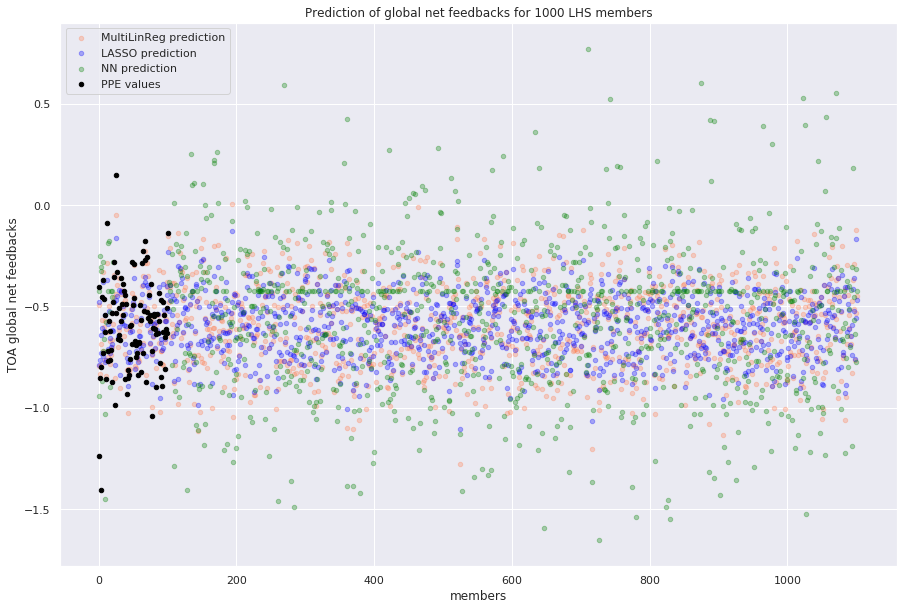

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
title = 'Prediction of global net feedbacks for 1000 LHS members'

# y_true validation
DFYeq.plot(kind='scatter', x='members_0', y='y_eq', color='coral', alpha = 0.3,
                     style='.', legend=False, ax = ax)
DFYeq_lasso.plot(kind='scatter', x='members_0',legend=False, y='y_eq', color='blue', alpha = 0.3,
                     style='.', ax = ax)
DFYeq_NN.plot(kind='scatter', x='members',legend=False, y='y_eq', color='green', alpha = 0.3,
                     style='.', ax = ax)

# (y_true) : PC1 - EOF1 dans l'ensemble
DFYeq.plot(kind='scatter', x='members_0', y='y_true', color='black', 
                     style='.', ax = ax)

# LHS Prediction
DFYpred.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='coral', 
             alpha=0.3,linewidth=1.0,ax=ax)
DFYpred_lasso.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='blue', 
             alpha=0.3,linewidth=1.0,ax=ax)
DFYpred_NN.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='green', 
             alpha=0.3,linewidth=1.0,ax=ax)


plt.xlabel('members')
plt.ylabel('TOA global net feedbacks')
plt.legend(['MultiLinReg prediction', 'LASSO prediction', 'NN prediction','PPE values'])
plt.title(title)
#plt.xlim(-4,200)
#plt.ylim(1.0,2.8)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [62]:
MultiLinReg_validation = DFYeq['y_eq'].values
MultiLinReg_prediction = DFYpred['y_pred'].values

LASSO_validation = DFYeq_lasso['y_eq'].values
LASSO_prediction = DFYpred_lasso['y_pred'].values

NN_validation = DFYeq_NN['y_eq'].values
NN_prediction = DFYpred_NN['y_pred'].values

# Save the predictionc in numpy arrays : 
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_FdbckSW.npy', 
        MultiLinReg_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_FdbckSW.npy', 
        MultiLinReg_prediction)

np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_FdbckSW.npy', 
        LASSO_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_FdbckSW.npy', 
        LASSO_prediction)

np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_FdbckSW.npy', 
        NN_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_FdbckSW.npy', 
        NN_prediction)

# Choix des paramètres réduits 

## Net feedbacks

In [137]:
Coeffs_abs = Coeffs.abs().sort_values()
Coeffs_abs

coeff_df = pd.DataFrame()
coeff_df['coeff'] = Coeffs_abs
coeff_df['param'] = range(0,30,1)
coeff_df

,coeff,param
RKDX,0.001138,0
AGRE2,0.001630,1
RAUTEFR,0.003321,2
VVN,0.003533,3
RQLCR,0.006650,4
ALMAVE,0.008045,5
REFLCAPE,0.008819,6
RLWINHF_LIQ,0.008968,7
RSWINHF_ICE,0.011362,8
RQICRMIN,0.012297,9


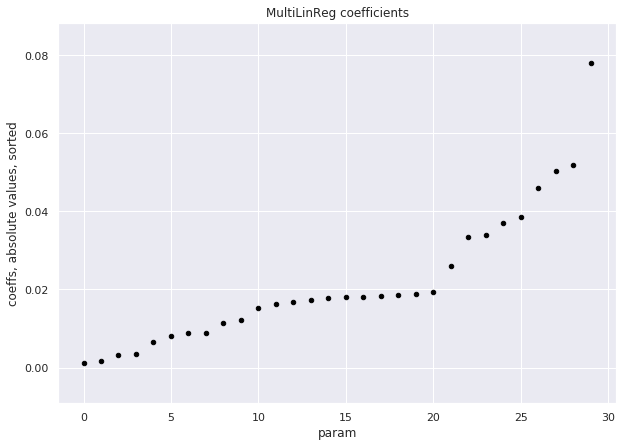

In [138]:
ax = plt.gca()
title = 'MultiLinReg coefficients'
coeff_df.plot(kind='scatter', x='param', y='coeff', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('param')
plt.ylabel('coeffs, absolute values, sorted')
plt.title(title)
#plt.xlim(-2,0)
#plt.ylim(-2,0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [33]:
param_reduce_df = pd.DataFrame()
param_reduce_df['ALMAVE'] = X[:,3]
param_reduce_df['VVX'] = X[:,21]
param_reduce_df['RKDN'] = X[:,16]
param_reduce_df['FNEBC'] = X[:,23]
param_reduce_df['AGRE1'] = X[:,5]

param_reduce_df

,ALMAVE,VVX,RKDN,FNEBC,AGRE1
0,0.430787,1.051322,0.102950,-1.314350,0.431537
1,-0.052349,-0.856404,-0.059809,1.002380,-1.340086
2,0.385616,0.203602,1.197834,1.671869,-1.279800
3,-1.606987,-0.993339,-0.028011,0.753320,-0.208517
4,-1.149318,0.686770,-0.837466,1.323667,1.156456
...,...,...,...,...,...
97,1.086707,1.524833,-0.851678,-0.915265,1.725910
98,1.325052,-0.940250,0.409583,0.630209,-1.328490
99,-0.015141,-0.779767,-0.149940,0.759087,0.457391
100,-1.639490,-0.483038,0.939432,1.214026,0.486299


In [35]:
param_reduce = param_reduce_df.values

# Save the predictionc in numpy arrays : 
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy', 
        param_reduce)

## SW feedbacks

In [139]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [140]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -0.597028771196218
Coefficients: 
 [-0.06956404 -0.08374792 -0.02751958  0.01743058  0.03994956  0.03577241
  0.00295868 -0.06142288 -0.01642105 -0.01117891 -0.03443108 -0.05053799
 -0.00054241  0.03602557 -0.03387965  0.01624651  0.02809992 -0.02627373
  0.05772958 -0.01499955 -0.0048491   0.04420538  0.01996117 -0.02046245
 -0.02059705  0.01624456 -0.00719761  0.0011919  -0.0221017  -0.06750299]
Score: 
 0.6744894562879027


In [141]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs

AKN           -0.069564
ALPHAT        -0.083748
ALD           -0.027520
ALMAVE         0.017431
AGREF          0.039950
AGRE1          0.035772
AGRE2          0.002959
RAUTEFR       -0.061423
RQLCR         -0.016421
RAUTEFS       -0.011179
RQICRMIN      -0.034431
RQICRMAX      -0.050538
TFVL          -0.000542
TFVI           0.036026
TFVR          -0.033880
TFVS           0.016247
RKDN           0.028100
RKDX          -0.026274
TENTR          0.057730
TENTRX        -0.015000
VVN           -0.004849
VVX            0.044205
ALFX           0.019961
FNEBC         -0.020462
GCTURB        -0.020597
RLWINHF_ICE    0.016245
RLWINHF_LIQ   -0.007198
RSWINHF_ICE    0.001192
RSWINHF_LIQ   -0.022102
REFLCAPE      -0.067503
Name: 0, dtype: float64

In [142]:
Coeffs_abs = Coeffs.abs().sort_values()
Coeffs_abs

coeff_df = pd.DataFrame()
coeff_df['coeff'] = Coeffs_abs
coeff_df['param'] = range(0,30,1)
coeff_df

,coeff,param
TFVL,0.000542,0
RSWINHF_ICE,0.001192,1
AGRE2,0.002959,2
VVN,0.004849,3
RLWINHF_LIQ,0.007198,4
RAUTEFS,0.011179,5
TENTRX,0.015000,6
RLWINHF_ICE,0.016245,7
TFVS,0.016247,8
RQLCR,0.016421,9


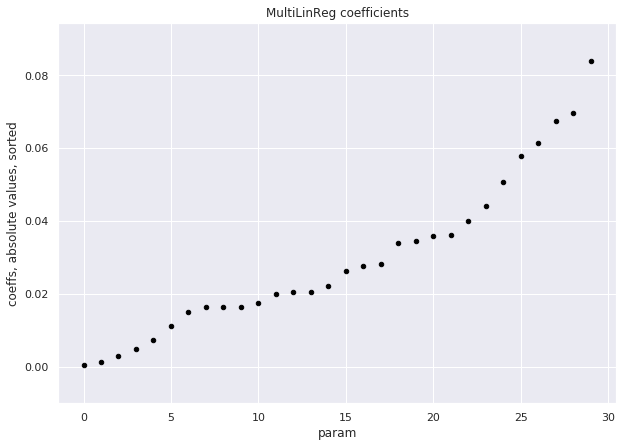

In [143]:
ax = plt.gca()
title = 'MultiLinReg coefficients'
coeff_df.plot(kind='scatter', x='param', y='coeff', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('param')
plt.ylabel('coeffs, absolute values, sorted')
plt.title(title)
#plt.xlim(-2,0)
#plt.ylim(-2,0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## LW feedbacks

In [146]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [147]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 1.96206403947344
Coefficients: 
 [ 0.03108651  0.03347176  0.0448688  -0.00938496 -0.02303303 -0.00173328
 -0.00132918  0.05810208  0.0230704   0.03720245  0.02213456  0.00451407
  0.01913553 -0.01774301  0.01574154  0.0357783   0.00532473  0.02513526
 -0.03889375 -0.00288283  0.00131557 -0.02492223  0.05808209  0.03576916
  0.00439901  0.00190533  0.01616578 -0.01255359 -0.01500551  0.05868404]
Score: 
 0.768213861151334


In [148]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs

AKN            0.031087
ALPHAT         0.033472
ALD            0.044869
ALMAVE        -0.009385
AGREF         -0.023033
AGRE1         -0.001733
AGRE2         -0.001329
RAUTEFR        0.058102
RQLCR          0.023070
RAUTEFS        0.037202
RQICRMIN       0.022135
RQICRMAX       0.004514
TFVL           0.019136
TFVI          -0.017743
TFVR           0.015742
TFVS           0.035778
RKDN           0.005325
RKDX           0.025135
TENTR         -0.038894
TENTRX        -0.002883
VVN            0.001316
VVX           -0.024922
ALFX           0.058082
FNEBC          0.035769
GCTURB         0.004399
RLWINHF_ICE    0.001905
RLWINHF_LIQ    0.016166
RSWINHF_ICE   -0.012554
RSWINHF_LIQ   -0.015006
REFLCAPE       0.058684
Name: 0, dtype: float64

In [149]:
Coeffs_abs = Coeffs.abs().sort_values()
Coeffs_abs

coeff_df = pd.DataFrame()
coeff_df['coeff'] = Coeffs_abs
coeff_df['param'] = range(0,30,1)
coeff_df

,coeff,param
VVN,0.001316,0
AGRE2,0.001329,1
AGRE1,0.001733,2
RLWINHF_ICE,0.001905,3
TENTRX,0.002883,4
GCTURB,0.004399,5
RQICRMAX,0.004514,6
RKDN,0.005325,7
ALMAVE,0.009385,8
RSWINHF_ICE,0.012554,9


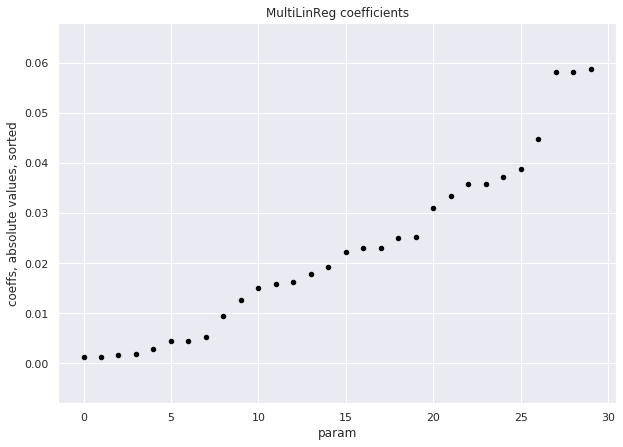

In [150]:
ax = plt.gca()
title = 'MultiLinReg coefficients'
coeff_df.plot(kind='scatter', x='param', y='coeff', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('param')
plt.ylabel('coeffs, absolute values, sorted')
plt.title(title)
#plt.xlim(-2,0)
#plt.ylim(-2,0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Sobol analysis

In [12]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [13]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import pandas as pd


# Set the boundaries of the parameter values
bounds=[]
for i in range(0,len(param_names),1):
    bounds_tmp=[X[:,i].min(), X[:,i].max()]
    bounds.append(bounds_tmp)
                                                      
# Define the problem
problem = {
    'num_vars': len(param_names),
    'names': [param_names],
    'bounds' : bounds
}


# Make the Satelli sampling
param_values = saltelli.sample(problem, 1000)


In [14]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -1.365035703564002
Coefficients: 
 [ 0.00653055 -0.01819391  0.00219821 -0.06344135  0.03409543  0.04018202
  0.02023204  0.03256797 -0.00244833 -0.00594943  0.02828375 -0.00740924
 -0.03135033  0.0127495   0.01865518 -0.00617013 -0.04823539  0.01493511
 -0.03440692  0.0134147  -0.03867545  0.06073337 -0.01342743 -0.04019921
  0.00937868 -0.00454055  0.00619481  0.03386664 -0.01771072 -0.0172784 ]
Score: 
 0.2986249927511614


In [15]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs

AKN            0.006531
ALPHAT        -0.018194
ALD            0.002198
ALMAVE        -0.063441
AGREF          0.034095
AGRE1          0.040182
AGRE2          0.020232
RAUTEFR        0.032568
RQLCR         -0.002448
RAUTEFS       -0.005949
RQICRMIN       0.028284
RQICRMAX      -0.007409
TFVL          -0.031350
TFVI           0.012749
TFVR           0.018655
TFVS          -0.006170
RKDN          -0.048235
RKDX           0.014935
TENTR         -0.034407
TENTRX         0.013415
VVN           -0.038675
VVX            0.060733
ALFX          -0.013427
FNEBC         -0.040199
GCTURB         0.009379
RLWINHF_ICE   -0.004541
RLWINHF_LIQ    0.006195
RSWINHF_ICE    0.033867
RSWINHF_LIQ   -0.017711
REFLCAPE      -0.017278
Name: 0, dtype: float64

In [27]:

# Run the emulator for all of the cases

R = regr.intercept_

N=len(param_values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*param_values[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
    
# Perform analysis
y_pred=np.array(y_pred)
Si = sobol.analyze(problem, y_pred)
print(Si['S1'])

[1.41360748e-03 1.22063120e-02 1.38542612e-04 1.80484090e-01
 4.63353726e-02 5.81355165e-02 1.57735832e-02 4.20565633e-02
 5.34126305e-04 1.43929242e-03 4.58586446e-02 2.40758342e-03
 4.05875359e-02 6.99756680e-03 1.35766779e-02 9.59653716e-04
 9.94083151e-02 9.83775406e-03 4.83830817e-02 7.38525107e-03
 6.05670294e-02 1.56032569e-01 1.01515084e-02 6.53062071e-02
 4.68032789e-03 7.77979965e-04 1.09387804e-03 5.20944858e-02
 1.06740485e-02 1.44707527e-02]


/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


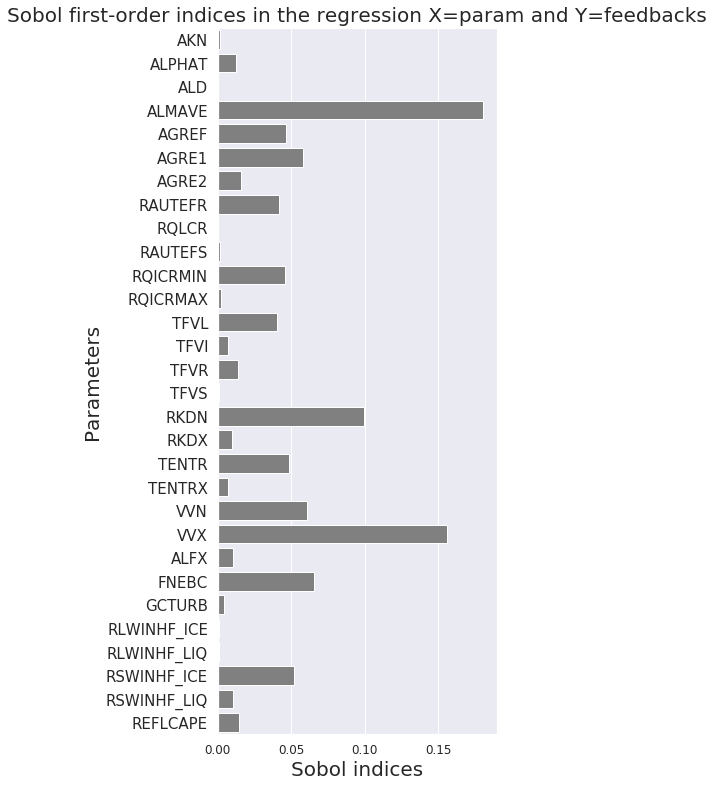

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data=pd.DataFrame()
data['Parameters']=param_names
data['Sobol1']=Si['S1']

# Plot the Sobol index to identify the most important parameters 
fig, ax = plt.subplots(figsize=(5,13))
ax = sns.barplot(x='Sobol1',y='Parameters',data=data, color='grey', orient='h', ax=ax)

plt.title('Sobol first-order indices in the regression X=param and Y=feedbacks', fontsize=20)
plt.xlabel('Sobol indices', fontsize=20)
plt.ylabel('Parameters', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=12)
    
#plt.show()

#   Enregistrer les figures ...............................................................

plt.savefig("/data/home/globc/peatier/figures/Sobol_indices.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

## Sobol analysis with Neural Network 

In [27]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF1pc_SW.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [28]:
# split the dataset
X_train = X[0:80,:]
X_test = X[80:,:]
#X_val = X[40:,:]

y_train = y[0:80]
y_test = y[80:]
#y_val = y[40:]

In [29]:
NN = MLPRegressor(hidden_layer_sizes=(5,2))
NN = NN.fit(X_train,y_train)

y_val = NN.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_val))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_val)))

Mean Absolute Error: 0.20953755068176347
Mean Squared Error: 0.05858789224202207
Root Mean Squared Error: 0.24204935910268813


/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import pandas as pd


# Set the boundaries of the parameter values
bounds=[]
for i in range(0,len(param_names),1):
    bounds_tmp=[X[:,i].min(), X[:,i].max()]
    bounds.append(bounds_tmp)
                                                      
# Define the problem
problem = {
    'num_vars': len(param_names),
    'names': [param_names],
    'bounds' : bounds
}


# Make the Satelli sampling
param_values = saltelli.sample(problem, 1000)


In [31]:
# Run the emulator for all of the cases

y_pred = NN.predict(param_values)
    
    
# Perform analysis
y_pred=np.array(y_pred)
Si = sobol.analyze(problem, y_pred)
print(Si['S1'])

[ 0.00475643  0.00012123 -0.00461485  0.02037286  0.00112333 -0.00141046
  0.07326365 -0.01122929  0.0412204   0.00276539  0.04415412  0.00719297
  0.00420398  0.0001798  -0.00794196 -0.00069771  0.04221395  0.00449525
  0.02180457  0.05096107 -0.00808501  0.00251478  0.00878266  0.01542161
  0.00633491  0.00531987  0.01981234  0.0245922  -0.00013325  0.01074494]


/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


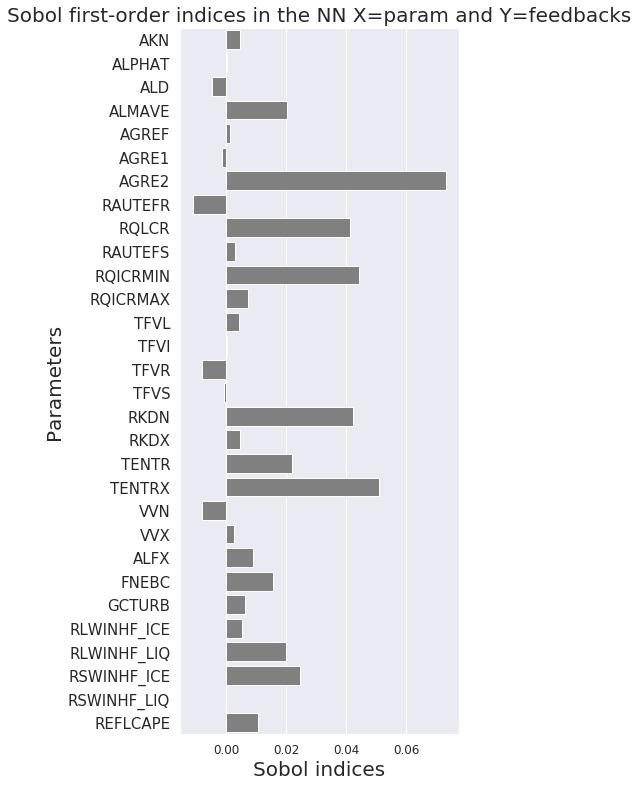

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data=pd.DataFrame()
data['Parameters']=param_names
data['Sobol1']=Si['S1']

# Plot the Sobol index to identify the most important parameters 
fig, ax = plt.subplots(figsize=(5,13))
ax = sns.barplot(x='Sobol1',y='Parameters',data=data, color='grey', orient='h', ax=ax)

plt.title('Sobol first-order indices in the NN X=param and Y=feedbacks', fontsize=20)
plt.xlabel('Sobol indices', fontsize=20)
plt.ylabel('Parameters', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=12)
    
#plt.show()

#   Enregistrer les figures ...............................................................

plt.savefig("/data/home/globc/peatier/figures/Sobol_indices.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)